Y: 74, X: 149


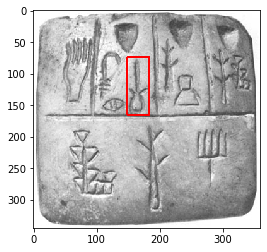

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as sp


# Find template 2D
def find_template_2D(template, img):
    # TODO: Find template in img and return [y x] location. Make sure this location is the top-left corner of the match.
    # Use scipy.signal.correlate2d
    corr = sp.correlate2d(img, template, mode='same', boundary='symm')
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    y = y - int((template.shape[0] - 1) / 2)
    x = x - int((template.shape[1] - 1) / 2)
    return y, x

tablet = cv2.imread('images/tablet.png', 0)
plt.imshow(cv2.cvtColor(tablet, cv2.COLOR_BGR2RGB))

glyph = tablet[74:165, 149:184]
plt.imshow(cv2.cvtColor(glyph, cv2.COLOR_BGR2RGB))

tablet_2 = 1. * tablet - np.mean(tablet)
glyph_2 = 1. * glyph - np.mean(glyph)

y, x = find_template_2D(glyph_2, tablet_2)
print("Y: {}, X: {}".format(y, x))

# The code below is not part of the quiz but helps to verify the results are
# what we are looking for.
tablet = cv2.cvtColor(tablet, code=cv2.COLOR_GRAY2BGR)
cv2.rectangle(tablet, (x, y), (x + glyph.shape[1], y + glyph.shape[0]),
              (0, 0, 255), thickness=2)
cv2.imshow('Rectangle', tablet)
plt.imshow(cv2.cvtColor(tablet, cv2.COLOR_BGR2RGB))

In [6]:
glyph_2.shape

(91, 35)

In [7]:
tablet_2.shape

(345, 360)